In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = "../data/IBMCloud_Recommendar_AV.csv"

In [3]:
df = pd.read_csv(data)
df.head()

,CustomerID,InvoiceNo,Quantity,InvoiceDate,UnitPrice,Country,StockCode
0,27270,27270,7,01/12/10 8:26,2.55,PX,85123AY
1,27270,27270,7,01/12/10 8:26,3.39,PX,71053R
2,27270,27270,9,01/12/10 8:26,2.75,PX,84406BH
3,27270,27270,7,01/12/10 8:26,3.39,PX,84029GV
4,27270,27270,7,01/12/10 8:26,3.39,PX,84029EX


In [13]:
df.groupby('Country')['UnitPrice'].mean().sort_values().head()

Country
AJ    1.576786
TA    1.667500
HL    1.675000
BD    1.764375
WW    2.025751
Name: UnitPrice, dtype: float64

In [18]:
df.groupby('Country')['UnitPrice'].count().sort_values()

Country
HL         2
FL         9
TA        16
GI        19
AJ        28
SC        30
AR        32
BD        32
RO        45
FX        57
IP        67
SP        75
CD        88
SN       109
SE       111
IB       163
EN       202
WW       233
IE       239
RC       245
IL       249
FV       253
SK       272
YI       344
BU       453
JN       519
UA       610
OF       731
FM       737
XW      1050
HW      1123
ZU      1299
CI      1419
IG      1645
BC      4639
GJ      5134
RA      5304
PX    302992
Name: UnitPrice, dtype: int64

In [21]:
df.groupby(['Country', 'StockCode'])['UnitPrice'].count().sort_values().tail()

Country  StockCode
PX       20725N        890
         47566Y        991
         22423U       1132
         85099BJ      1217
         85123AY      1341
Name: UnitPrice, dtype: int64

In [22]:
## as PX has most data so lets take for 'PX'

In [44]:
df_px = df.loc[df['Country']=='PX']
df_px.head()

,CustomerID,InvoiceNo,Quantity,InvoiceDate,UnitPrice,Country,StockCode
0,27270,27270,7,01/12/10 8:26,2.55,PX,85123AY
1,27270,27270,7,01/12/10 8:26,3.39,PX,71053R
2,27270,27270,9,01/12/10 8:26,2.75,PX,84406BH
3,27270,27270,7,01/12/10 8:26,3.39,PX,84029GV
4,27270,27270,7,01/12/10 8:26,3.39,PX,84029EX


In [47]:
# drop rows where quantity is invlalid
df_px1 =  df_px[df_px['Quantity']>1]
df_px1.head()

,CustomerID,InvoiceNo,Quantity,InvoiceDate,UnitPrice,Country,StockCode
0,27270,27270,7,01/12/10 8:26,2.55,PX,85123AY
1,27270,27270,7,01/12/10 8:26,3.39,PX,71053R
2,27270,27270,9,01/12/10 8:26,2.75,PX,84406BH
3,27270,27270,7,01/12/10 8:26,3.39,PX,84029GV
4,27270,27270,7,01/12/10 8:26,3.39,PX,84029EX


In [49]:
df_px1.head()

,CustomerID,InvoiceNo,Quantity,InvoiceDate,UnitPrice,Country,StockCode
0,27270,27270,7,01/12/10 8:26,2.55,PX,85123AY
1,27270,27270,7,01/12/10 8:26,3.39,PX,71053R
2,27270,27270,9,01/12/10 8:26,2.75,PX,84406BH
3,27270,27270,7,01/12/10 8:26,3.39,PX,84029GV
4,27270,27270,7,01/12/10 8:26,3.39,PX,84029EX


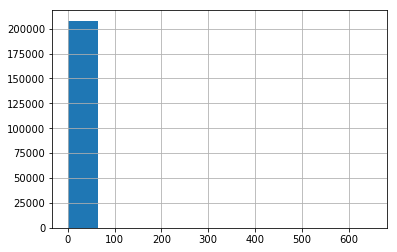

In [53]:
df_px1['UnitPrice'].hist(bins=10)

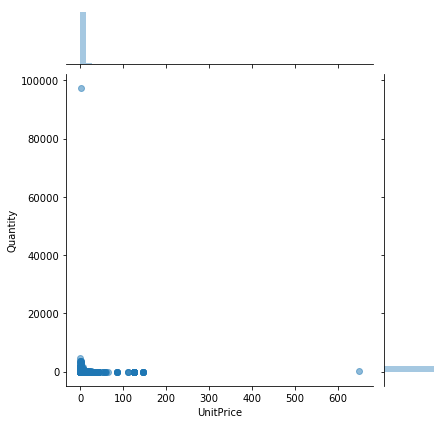

In [55]:
sns.jointplot(x='UnitPrice', y='Quantity', data=df_px1, alpha=0.5)

In [57]:
df_pivot =  df_px1.pivot_table(index = 'CustomerID', columns='StockCode', values='UnitPrice') 
df_pivot.head()

StockCode,10002F,10080Q,10120M,10123CU,10124AW,10124GF,10125J,10133M,10135P,11001M,...,90214OZ,90214PB,90214RZ,90214SF,90214TT,90214UO,90214VD,90214WH,90214YL,90214ZJ
CustomerID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df_10002F= df_pivot['10002F']
df_10080Q = df_pivot['10080Q']

In [60]:
similarto10002F = df_pivot.corrwith(df_10002F)
similarto10080Q = df_pivot.corrwith(df_10080Q)

/Users/sulbha/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/sulbha/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [78]:
df_corr_10002F = pd.DataFrame(data = similarto10002F, columns=['correlation'])
df_corr_10002F.dropna(inplace = True)
df_corr_10002F.head()

,correlation
StockCode,
10002F,1.000000
10133M,1.000000
10135P,1.000000
15034D,0.522233
15036Z,-0.033295


In [79]:
df_corr_10002F= df_corr_10002F[df_corr_10002F['correlation']>=1]

In [93]:
df2 = df_corr_10002F.sort_values(by='correlation', ascending=False).head(10)
df3 = df2.rename_axis('reco_stock').reset_index()
df3['StockCode'] = '10002F'
df3.head()

,reco_stock,correlation,StockCode
0,10002F,1.0,10002F
1,23287L,1.0,10002F
2,22837N,1.0,10002F
3,22851J,1.0,10002F
4,22899Q,1.0,10002F


In [103]:
df1 = df_px1[df_px1['StockCode']=='10002F'][['CustomerID', 'StockCode']].reset_index(drop=True)
df1.head()

,CustomerID,StockCode
0,141759,10002F
1,299097,10002F
2,460035,10002F
3,422766,10002F
4,223668,10002F


In [120]:
df_final = pd.DataFrame()
for index,row in df1.iterrows():
    df_temp = pd.DataFrame(data = [row['CustomerID']], columns=['CustomerID'])
    
    df_temp = pd.concat([df_temp, df3], axis=1)
    df_temp['CustomerID'] =row['CustomerID']
    print (df_temp)
    
    df_final.append(df_temp)
    

   CustomerID reco_stock  correlation StockCode
0      141759     10002F          1.0    10002F
1      141759     23287L          1.0    10002F
2      141759     22837N          1.0    10002F
3      141759     22851J          1.0    10002F
4      141759     22899Q          1.0    10002F
5      141759     22904F          1.0    10002F
6      141759     22945X          1.0    10002F
7      141759     22963K          1.0    10002F
8      141759     22968N          1.0    10002F
9      141759     22972W          1.0    10002F
   CustomerID reco_stock  correlation StockCode
0      299097     10002F          1.0    10002F
1      299097     23287L          1.0    10002F
2      299097     22837N          1.0    10002F
3      299097     22851J          1.0    10002F
4      299097     22899Q          1.0    10002F
5      299097     22904F          1.0    10002F
6      299097     22945X          1.0    10002F
7      299097     22963K          1.0    10002F
8      299097     22968N          1.0   

In [107]:
pd.concat([df1, df3], axis =1, join ='inner')

,CustomerID,StockCode,reco_stock,correlation,StockCode
0,141759,10002F,10002F,1.0,10002F
1,299097,10002F,23287L,1.0,10002F
2,460035,10002F,22837N,1.0,10002F
3,422766,10002F,22851J,1.0,10002F
4,223668,10002F,22899Q,1.0,10002F
5,142758,10002F,22904F,1.0,10002F
6,180018,10002F,22945X,1.0,10002F
7,315387,10002F,22963K,1.0,10002F
8,56340,10002F,22968N,1.0,10002F
9,231768,10002F,22972W,1.0,10002F
